## Codio Activity 6.9: Running DBSCAN

**Expected Time: 60 Minutes**

**Total Points: 20 Points**

This activity focuses on using the `DBSCAN` clustering algorithm with `sklearn`.  Contrary to the `KMeans` clusterer, `DBSCAN` does not take a number of clusters as argument.  Instead, the algorithm separates data based on areas of high and low density.  The parameters that determine this density are the `min_samples` and `eps` values.  We will explore how different values for these affect the clustering for our sample dataset.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN
from mpl_toolkits import mplot3d

### The Dataset

Again, data is generated using the `sklearn` datasets `make_blobs` function.  

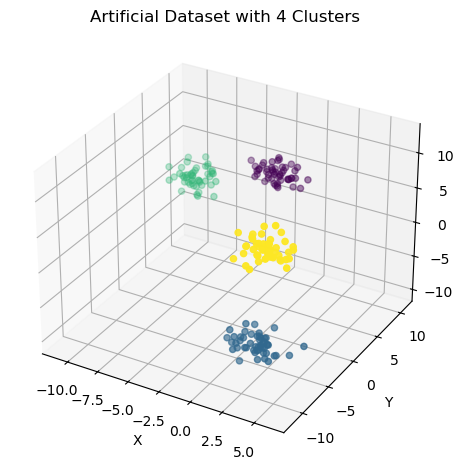

In [5]:
X, y = make_blobs(n_samples=200, n_features=3, centers = 4, random_state=42)
ax = plt.axes(projection = '3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Artificial Dataset with 4 Clusters')
plt.tight_layout();

[Back to top](#Index:) 

## Problem 1

### Instantiate a `DBSCAN` object

**4 Points**

The `DBSCAN` clusterer has been imported explicitly from the `sklearn` library.  Create a new instance of this clusterer and assign it to the variable `dbscan` below.   Leave all the arguments to their default setting.


In [7]:
### GRADED

# YOUR CODE HERE
dbscan = DBSCAN()

# Answer check
print(dbscan)
print(type(dbscan))

DBSCAN()
<class 'sklearn.cluster._dbscan.DBSCAN'>


[Back to top](#Index:) 

## Problem 2

### Cluster the data

**4 Points**

Now, use your clusterer `dbscan` to fit the data using the function `fit()` with argument equal to `X`.  

Again, you will not receive an output from the fit, but information will be stored in the instance.  To examine the labels, use the `.labels_` attribute of the fit model to access the predicted labels.  Assign your predicted labels as an array to the variable `predictions` below.

In [9]:
### GRADED

# YOUR CODE HERE
dbscan.fit(X)
predictions = dbscan.labels_

# Answer check
print(predictions[:10])
print(type(predictions))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
<class 'numpy.ndarray'>


[Back to top](#Index:) 

## Problem 3

### Examining the predicted labels

**4 Points**

Use `np.unique` function with argument equal to `predictons` to examine the unique values of the predicted values.  Assign the unique values of the labels to `unique_labels` below.  

How many cluster labels were determined by the algorithm?  Assign your answer as an integer to `n_clusters_default` below.

In [13]:
### GRADED

# YOUR CODE HERE
unique_labels = np.unique(predictions)
n_clusters_default = 0

# Answer check
print(unique_labels)

[-1]


[Back to top](#Index:) 

## Problem 4

### Recognizing the limitations

**4 Points**

Here, the predictions of the DBSCAN algorithm don't seem to be very good.  This is due to you using an inappropriate value for the `eps` attribute.  The default value is `eps = 0.5`, and this is used to determine the density of a cluster.  Our points are seperated by larger distances, so we should increase `eps` to a larger value in hopes of getting a better performing clustering. 

Below, instantiate and fit a `DBSCAN` clusterer with argument `eps` equal to `2.0` as `dbscan_eps_2` and examine the unique labels by chaining the `fit(X)` function.  

Next, use the `labels_` method on `dbscan_eps_2` and assign the new clusters labels as a NumPy array to `predictions_eps_2` below.  

Finally, use the NumPy function `unique` to assign the unique values of `predictions_eps_2` to `unique_labels_eps_2`.

In [15]:
### GRADED

# YOUR CODE HERE
dbscan_eps_2 = DBSCAN(eps=2.0).fit(X)
predictions_eps_2 = dbscan_eps_2.labels_
unique_labels_eps_2 = np.unique(predictions_eps_2)

# Answer check
print(unique_labels_eps_2)

[-1  0  1  2  3]


[Back to top](#Index:) 

## Problem 5

### How many non-cluster points

**4 Points**

Below, you can examine the results of the clustering.  Note that `DBSCAN` will always return the same clustering of a given dataset.  Also, while increasing `eps` led to a much more coherent clustering, some points were not identified as belonging to a cluster. Determine how many points were labeled as noise with your `dbscan_eps_2` predictions and assign this as an integer to `noise_eps_2` below.

![](images/eps2.png)

In [25]:
### GRADED

# YOUR CODE HERE
noise_eps_2 = np.sum(predictions_eps_2 == -1)

# Answer check
print(noise_eps_2)

2


### Examining the difference across multiple epsilons

In [29]:
#various epsilon values
epsilons = np.arange(0.1, 10, 0.2)

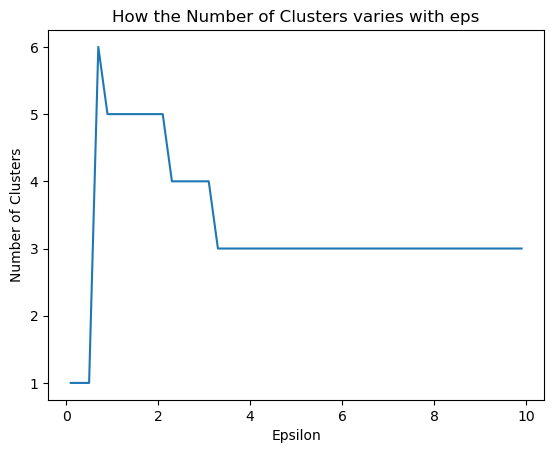

In [31]:
#examine the number of clusters created with 
#each epsilon value. 
#Plot the results
n_clusters_list = []
for eps in epsilons:
    db = DBSCAN(eps = eps).fit(X)
    n_clusters = len(np.unique(db.labels_))
    n_clusters_list.append(n_clusters)
plt.plot(epsilons, n_clusters_list)
plt.xlabel('Epsilon')
plt.ylabel('Number of Clusters')
plt.title('How the Number of Clusters varies with eps');